In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from load_data import load_dataset
from public_test import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [22]:
# Loading the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


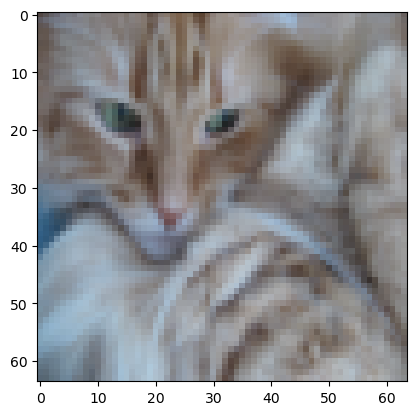

In [23]:
# Testing the train dataset
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# Testing the shape and size
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# Reshape the training and test testing

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [8]:
def sigmoid(z) :
    z = -z
    z = np.exp(z)
    z = z+1
    z = 1/z
    return z

In [9]:
# Testing
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def initialize_with_zeros(size) :
    w = np.zeros((size,1))
    b = 0.0
    return w,b

In [11]:
# Testing
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))


initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


In [12]:
def propagate(w,b,X,Y) :
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    cost = np.squeeze(np.array(cost))
    
    dw = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)
    
    grads = {"dw" : dw,
            "db" : db}
    
    return grads, cost

In [13]:
# Testing of Propagate
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


In [14]:
def optimize(w, b, X, Y,num_iterations, learning_rate, print_cost) :
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    
    for i in range(num_iterations) :
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i%100==0 :
            costs.append(cost)
            
            if print_cost :
                print ("Cost after iteration %i: %f" %(i, cost))
                
    params = {"w" : w,
             "b" : b}
    
    grads = {"dw" : dw,
            "db" : db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


In [16]:
def predict(w,b,X) :
    
    m = X.shape[1]
    w = w.reshape(X.shape[0],1)
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]) :
        
        if(A[0][i]>0.5) :
            Y_prediction[0][i] = 1
        else :
            Y_prediction[0][i] = 0
        
    return Y_prediction

In [17]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


y = 1, you predicted that it is a Cat


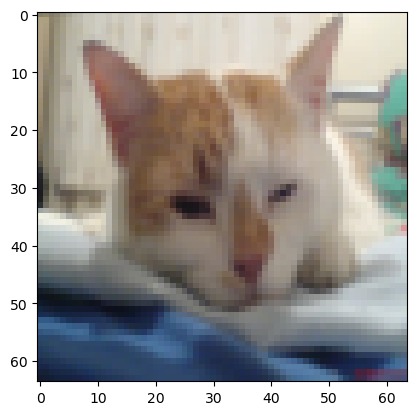

In [35]:
# Testing
index = 17
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
ct = ''
if test_set_y[0,index]==1 :
    ct = 'Cat'
else :
    ct = 'not a Cat'
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a "+ct)